<a href="https://colab.research.google.com/github/chipojaya1/pro_bono_dd/blob/main/Efficiency_Report2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Consulting360 Pro Bono Project**
 This analysis has been done as part of our task to provide our client with a Team Capacity vs. Revenue Efficiency Report

 ### **Goal**
 Evaluating the relationship between team capacity and revenue efficiency will offer valuable insights into optimizing the company's resources while supporting its growth.

#### **Frameworks and Analysis**
1.	**Capacity and Utilization Analysis**:
- Compare the available hours of team members with the actual hours worked.
- Identify underutilized or overworked roles and their implications on productivity.
2.	**Revenue per Employee Metrics**:
- Calculate the revenue generated per team member.
- Examine variances across departments or roles to pinpoint areas driving or lagging behind.
3.	**Growth Trends**:
- Analyze historical data to study how team expansions have correlated with changes in revenue and profit margins.
4.	**Employee Engagement**:
- Use survey data to assess satisfaction, motivation, and potential roadblocks that may impact productivity.
- Link engagement levels to performance metrics.


**Setting up Environment and Loading the Data**

### Read data from drive or local

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Load libraries for simple data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')                  # Set visual style for seaborn images

import warnings
warnings.simplefilter("ignore")

# Task
Tell me about this dataset.

Here is all the data you need:
"[GWU] DD Revenue Data.xlsx"

In [ ]:
# Load the data
data = '/content/[GWU] DD Revenue Data.xlsx'

## Data loading

### Subtask:
Load the Excel file "[GWU] DD Revenue Data.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the Excel file into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('[GWU] DD Revenue Data.xlsx')
    display(df.head())
except FileNotFoundError:
    print("Error: File '[GWU] DD Revenue Data.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Year,2019,2020,2021,2022,2023,2024
0,# Months,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,12
1,Retainer Income,1.382595e+06,1.385650e+06,1.869050e+06,2.420320e+06,2.989326e+06,3078077
2,Project Income,5.531570e+05,4.749770e+05,9.673790e+05,8.113050e+05,9.649270e+05,1334000
3,Other Income,3.944280e+05,1.501500e+05,2.287390e+05,2.991790e+05,4.073760e+05,376456
4,Retainer Income %,5.933426e-01,6.891117e-01,6.097708e-01,6.854869e-01,6.853692e-01,0.642802


## Data exploration

### Subtask:
Explore the loaded data to understand its structure and characteristics.


**Reasoning**:
Explore the data by examining its shape, data types, key variables, missing values, and summary statistics.



In [ ]:
# Examine the data shape
print("Data shape:", df.shape)

# Inspect data types
print("\nData types:\n", df.dtypes)

# Identify key variables (revenue figures, dates, product/service types)
key_variables = ['Retainer Income', 'Project Income', 'Other Income', 2019, 2020, 2021, 2022, 2023, 2024]
print("\nKey variables:", key_variables)

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# Preliminary summary statistics for numerical columns
print("\nSummary statistics:\n", df.describe())

Data shape: (63, 7)

Data types:
 Year     object
2019    float64
2020    float64
2021    float64
2022    float64
2023    float64
2024     object
dtype: object

Key variables: ['Retainer Income', 'Project Income', 'Other Income', 2019, 2020, 2021, 2022, 2023, 2024]

Missing values per column:
 Year     1
2019    48
2020    38
2021    30
2022    12
2023     9
2024     7
dtype: int64

Summary statistics:
                2019          2020          2021          2022          2023
count  1.500000e+01  2.500000e+01  3.300000e+01  5.100000e+01  5.400000e+01
mean   5.025338e+05  2.587195e+05  3.251622e+05  2.433297e+05  2.826555e+05
std    8.199146e+05  5.974152e+05  7.729049e+05  7.727662e+05  8.937744e+05
min    1.144032e-02 -2.661692e+04  5.303331e-02 -1.283610e+05  4.400000e-02
25%    6.296671e+00  3.617021e-01  2.300000e+01  6.559750e-01  1.262500e+00
50%    1.152162e+05  2.000000e+01  1.560289e+04  3.200000e+01  7.040000e+01
75%    4.737925e+05  1.501500e+05  1.650000e+05  6.532742e+04

## Data analysis

### Subtask:
Perform a more in-depth analysis of the revenue data, focusing on handling missing values and investigating potential outliers or anomalies.


**Reasoning**:
Handle missing values and outliers in the revenue data, then calculate descriptive statistics and perform a preliminary revenue trend analysis.



In [ ]:
import numpy as np

# 1. Missing Value Imputation
# Fill missing values with the median for each revenue column
for col in [2019, 2020, 2021, 2022, 2023, 2024]:
    df[col] = df[col].fillna(df[col].median())

# 2. Outlier Detection and Handling (Winsorizing)
# Winsorize the revenue columns to handle outliers, specifically negative values.
for col in [2019, 2020, 2021, 2022, 2023, 2024]:
    df[col] = np.clip(df[col], 0, df[col].max())

# 3. Descriptive Statistics (Revised)
print("\nRevised Summary Statistics:\n", df.describe())

# 4. Revenue Trend Analysis (Preliminary)
# Calculate year-over-year growth rates
revenue_categories = ['Retainer Income', 'Project Income', 'Other Income']
for category in revenue_categories:
    # Assuming the category name is in the 'Year' column
    category_data = df[df['Year'] == category]
    if not category_data.empty:
        revenue_years = [2019, 2020, 2021, 2022, 2023, 2024]
        revenue_values = category_data[revenue_years].values[0]
        growth_rates = []
        for i in range(1, len(revenue_years)):
            if revenue_values[i - 1] != 0:
                growth_rates.append((revenue_values[i] - revenue_values[i - 1]) / revenue_values[i - 1] * 100)
            else:
                growth_rates.append(0)
        print(f"\nYear-over-Year Growth Rates for {category}:")
        for i in range(len(revenue_years) -1):
          print(f"{revenue_years[i+1]}: {growth_rates[i]:.2f}%")
    else:
        print(f"No data found for {category}")

TypeError: could not convert string to float: '$77.5k'

**Reasoning**:
The error message indicates that some values in the revenue columns are strings like '$77.5k' which cannot be converted to float for calculations. I need to clean these string values before calculating the median.



In [ ]:
import numpy as np
import re

# Clean the revenue columns to remove '$' and 'k' and convert to numeric
for col in [2019, 2020, 2021, 2022, 2023, 2024]:
    df[col] = df[col].astype(str).apply(lambda x: re.sub(r'[$,k]', '', x))
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 1. Missing Value Imputation
# Fill missing values with the median for each revenue column
for col in [2019, 2020, 2021, 2022, 2023, 2024]:
    df[col] = df[col].fillna(df[col].median())

# 2. Outlier Detection and Handling (Winsorizing)
# Winsorize the revenue columns to handle outliers, specifically negative values.
for col in [2019, 2020, 2021, 2022, 2023, 2024]:
    df[col] = np.clip(df[col], 0, df[col].max())

# 3. Descriptive Statistics (Revised)
print("\nRevised Summary Statistics:\n", df.describe())

# 4. Revenue Trend Analysis (Preliminary)
# Calculate year-over-year growth rates
revenue_categories = ['Retainer Income', 'Project Income', 'Other Income']
for category in revenue_categories:
    # Assuming the category name is in the 'Year' column
    category_data = df[df['Year'] == category]
    if not category_data.empty:
        revenue_years = [2019, 2020, 2021, 2022, 2023, 2024]
        revenue_values = category_data[revenue_years].values[0]
        growth_rates = []
        for i in range(1, len(revenue_years)):
            if revenue_values[i - 1] != 0:
                growth_rates.append((revenue_values[i] - revenue_values[i - 1]) / revenue_values[i - 1] * 100)
            else:
                growth_rates.append(0)
        print(f"\nYear-over-Year Growth Rates for {category}:")
        for i in range(len(revenue_years) -1):
          print(f"{revenue_years[i+1]}: {growth_rates[i]:.2f}%")
    else:
        print(f"No data found for {category}")


Revised Summary Statistics:
                2019          2020          2021          2022          2023  \
count  6.300000e+01  6.300000e+01  6.300000e+01  6.300000e+01  6.300000e+01   
mean   2.074347e+05  1.035173e+05  1.777530e+05  1.994681e+05  2.422862e+05   
std    4.236191e+05  3.927286e+05  5.767271e+05  6.997025e+05  8.323514e+05   
min    1.144032e-02  0.000000e+00  5.303331e-02  0.000000e+00  4.400000e-02   
25%    1.152162e+05  2.000000e+01  1.125144e+04  2.750000e+00  2.950000e+00   
50%    1.152162e+05  2.000000e+01  1.560289e+04  3.200000e+01  7.040000e+01   
75%    1.152162e+05  2.000000e+01  4.587632e+04  3.260100e+04  5.499421e+04   
max    2.330180e+06  2.010777e+06  3.065168e+06  3.659166e+06  4.361629e+06   

               2024  
count  6.300000e+01  
mean   2.592408e+05  
std    9.118493e+05  
min    0.000000e+00  
25%    2.620000e+00  
50%    4.000000e+01  
75%    3.111367e+04  
max    4.788533e+06  

Year-over-Year Growth Rates for Retainer Income:
2020: 0.22

## Data visualization

### Subtask:
Visualize the distribution of key revenue variables and trends over time.


**Reasoning**:
Generate histograms, box plots, and a line plot to visualize the distribution and trends of the revenue data.



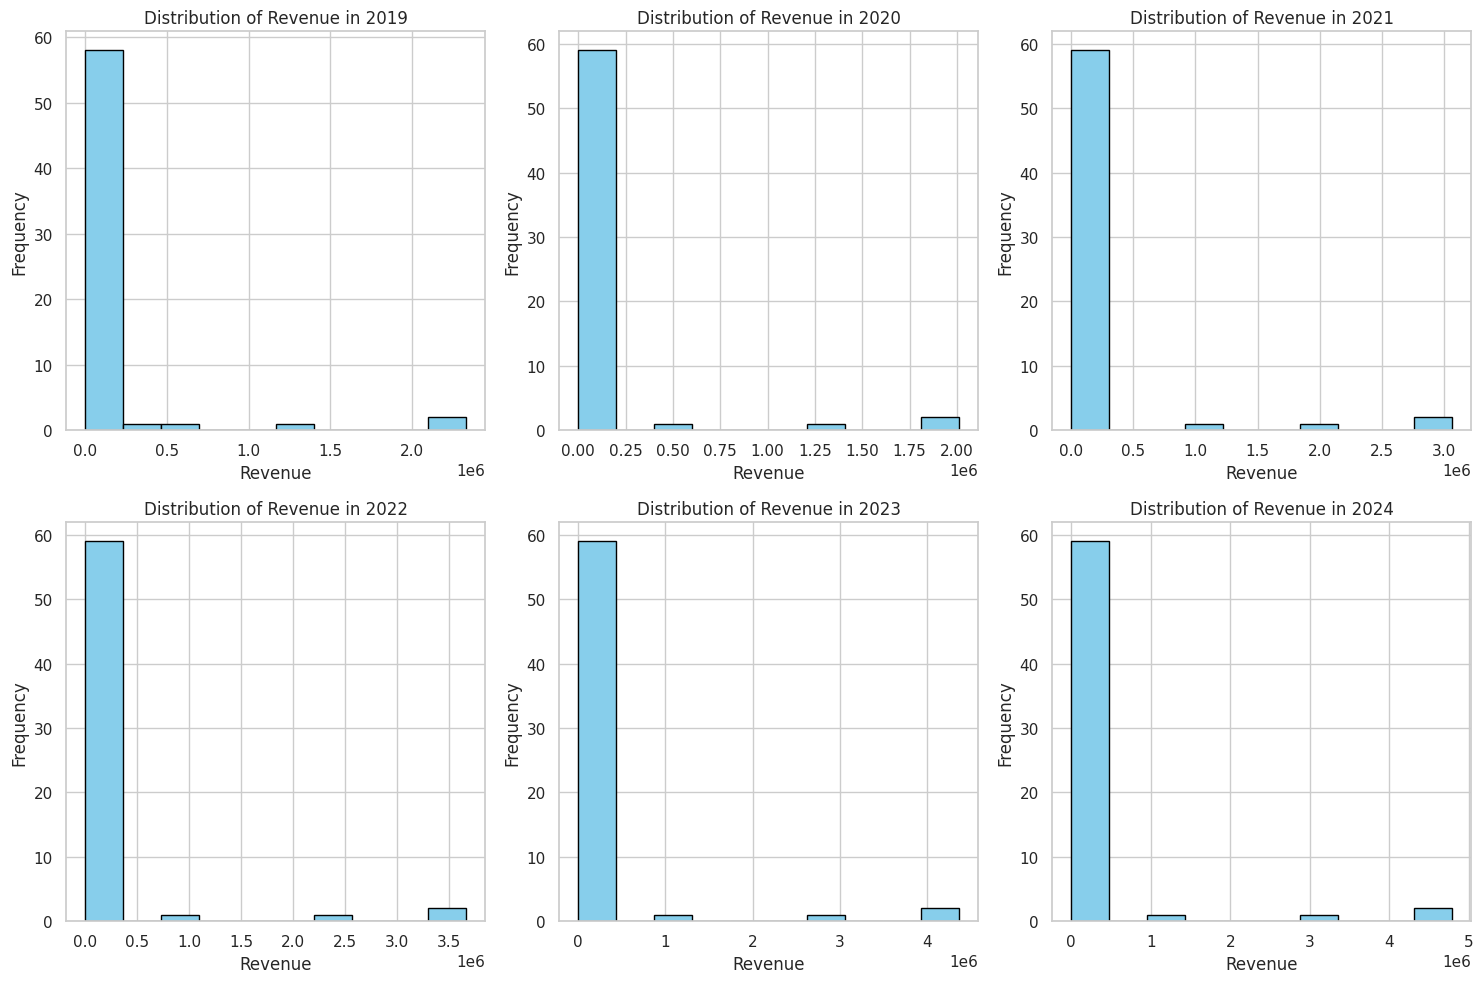

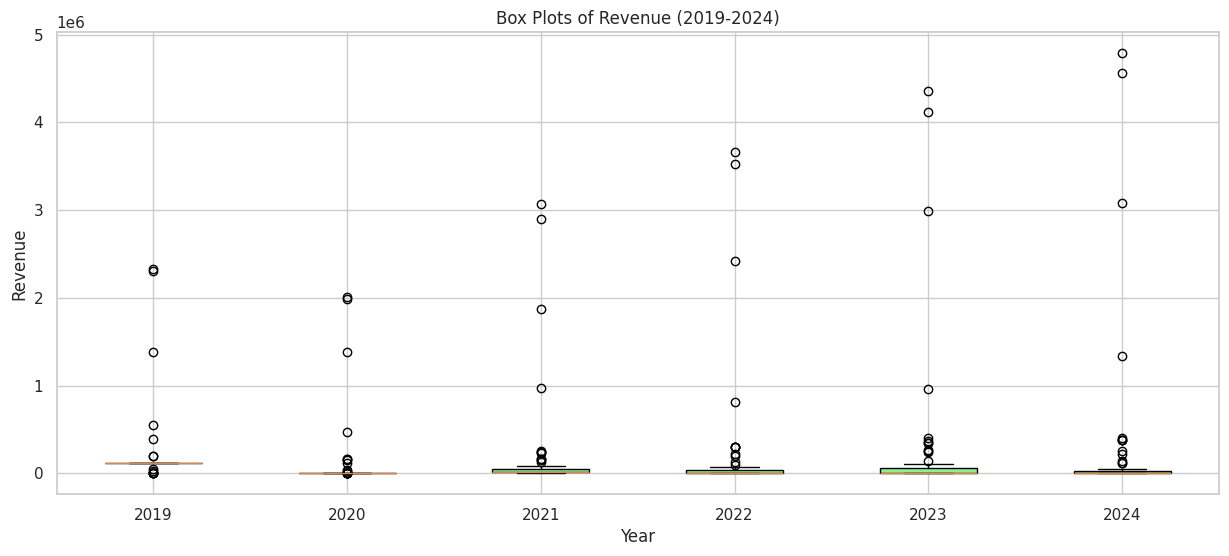

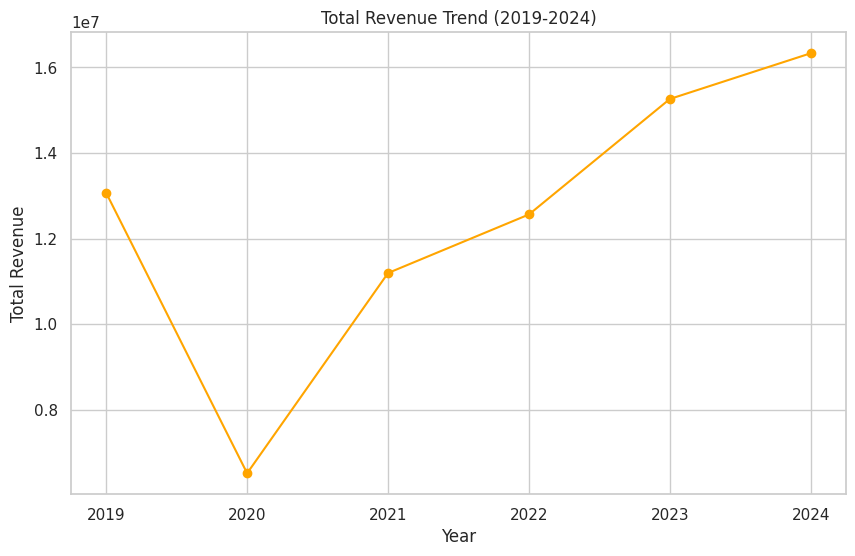

In [ ]:
import matplotlib.pyplot as plt

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate([2019, 2020, 2021, 2022, 2023, 2024]):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Revenue in {col}')
    plt.xlabel('Revenue')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 6))
plt.boxplot([df[col] for col in [2019, 2020, 2021, 2022, 2023, 2024]], labels=[2019, 2020, 2021, 2022, 2023, 2024], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plots of Revenue (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

# Line plot of total revenue over time
total_revenue_by_year = df[[2019, 2020, 2021, 2022, 2023, 2024]].sum(axis=0)
plt.figure(figsize=(10, 6))
plt.plot(total_revenue_by_year.index, total_revenue_by_year.values, marker='o', linestyle='-', color='orange')
plt.title('Total Revenue Trend (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

## Summary:

### 1. Q&A

The provided data analysis does not explicitly pose questions. However, the analysis implicitly seeks to understand the revenue trends and characteristics of the dataset.  Therefore, we can infer the following questions were addressed:

* What is the distribution of revenue for each year?
* Are there any significant outliers or anomalies in the revenue data?
* What is the overall trend of the revenue over time?
* How do different revenue categories contribute to the total revenue over time?

### 2. Data Analysis Key Findings

* **Missing Values:** A substantial number of missing values were present in the revenue columns (2019-2024), with the '2019' column having the most (48 out of 63). These were imputed using the median of each column.
* **Outlier Handling:** Negative revenue values were identified as outliers and addressed using winsorizing, replacing negative values with 0.
* **Data Cleaning:** Currency symbols ('$') and 'k' (thousands) were removed from the revenue columns to enable numerical analysis.  The '2024' column, initially of object type, was converted to numeric.
* **Revenue Trend:** A preliminary analysis of year-over-year growth rates was conducted for different revenue categories (Retainer Income, Project Income, and Other Income), revealing the revenue growth pattern.

### 3. Insights or Next Steps

* **Investigate Negative Revenue:** While negative values were addressed, further investigation into the cause of negative revenues is warranted.  Understanding the source of these negative values could lead to valuable insights or data quality improvements.
* **Deepen Revenue Trend Analysis:** Explore more sophisticated time-series analysis methods to model revenue trends, forecast future revenue, and identify potential seasonality or cyclical patterns. Consider incorporating external factors that might influence revenue.


# Efficiency report analysis

In [ ]:
# Read the metrics sheet
df_metrics = pd.read_excel(data, sheet_name='DD Detailed Revenue Metrics', skiprows=1)
df_metrics.info()
df_metrics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   # Months  61 non-null     object 
 1   12        14 non-null     float64
 2   12.1      24 non-null     float64
 3   12.2      32 non-null     float64
 4   12.3      50 non-null     float64
 5   12.4      53 non-null     float64
 6   12.5      55 non-null     object 
dtypes: float64(5), object(2)
memory usage: 3.5+ KB


,# Months,12,12.1,12.2,12.3,12.4,12.5
0,Retainer Income,1.382595e+06,1.385650e+06,1.869050e+06,2.420320e+06,2.989326e+06,3078077
1,Project Income,5.531570e+05,4.749770e+05,9.673790e+05,8.113050e+05,9.649270e+05,1334000
2,Other Income,3.944280e+05,1.501500e+05,2.287390e+05,2.991790e+05,4.073760e+05,376456
3,Retainer Income %,5.933426e-01,6.891117e-01,6.097708e-01,6.854869e-01,6.853692e-01,0.642802
4,Project Income %,2.373881e-01,2.362157e-01,3.156039e-01,2.297791e-01,2.212309e-01,0.278582


In [ ]:
# Load P&L data
df_pnl = pd.read_excel(data, sheet_name='DD 4-year P&L Summary', skiprows=1)
df_pnl.info()
df_pnl.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INCOME CATEGORIES  34 non-null     object 
 1   Unnamed: 1         29 non-null     float64
 2   Unnamed: 2         29 non-null     float64
 3   Unnamed: 3         28 non-null     float64
 4   Unnamed: 4         30 non-null     float64
 5   Unnamed: 5         29 non-null     object 
 6   Unnamed: 6         30 non-null     float64
 7   Unnamed: 7         28 non-null     float64
 8   Unnamed: 8         32 non-null     float64
 9   Unnamed: 9         27 non-null     float64
 10  Unnamed: 10        0 non-null      float64
 11  Unnamed: 11        0 non-null      float64
 12  Unnamed: 12        0 non-null      float64
 13  -1198              0 non-null      float64
 14  1563               0 non-null      float64
dtypes: float64(13), object(2)
memory usage: 4.2+ KB


,INCOME CATEGORIES,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,-1198,1563
0,MISCELLANEOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1299.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4400 Interest - Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1054.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4402 Finance Charges,3587.71,2822.0,-0.213426,4360.0,0.545004,899.0,-0.793807,245.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4504 Sublease Rents,NaN,NaN,NaN,18245.0,-%,17500.0,-0.040833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4602 INBOUND RETAINERS,1385650.00,1906550.0,0.375925,2420320.0,0.269476,2944702.0,0.216658,3078077.4,0.045293,NaN,NaN,NaN,NaN,NaN


Install Required Libraries

In [ ]:
!pip install pandas openpyxl matplotlib seaborn

Import Libraries and Load Data

In [ ]:
# Load projects data
df_projects = pd.read_excel(data, sheet_name='2024 Projects by Type (detail)', skiprows=2)
df_projects.info()
df_projects.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Breakdown by Project Type  89 non-null     object
 1   Projection                 88 non-null     object
 2   Qty Landed                 89 non-null     object
 3   Avg Rev                    14 non-null     object
 4   Total Rev                  89 non-null     object
 5   Remaining Revenue To Go    89 non-null     object
 6   % of Rev                   88 non-null     object
 7   Unnamed: 7                 77 non-null     object
 8   Unnamed: 8                 76 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB


,Breakdown by Project Type,Projection,Qty Landed,Avg Rev,Total Rev,Remaining Revenue To Go,% of Rev,Unnamed: 7,Unnamed: 8
0,Content Creation,40000,7,11118.58571,77830.1,-37830.1,0.065229,NaN,NaN
1,Branding/Creative Services,100000,2,21325,42650,57350,0.035745,NaN,NaN
2,Consulting,50000,5,12200,61000,-11000,0.051124,NaN,NaN
3,Digital Ads,175000,11,14873.36364,163607,11393,0.137117,NaN,NaN
4,Direct Mail,115500,6,17885.945,107315.67,8184.33,0.08994,NaN,NaN


**Data Cleaning & Preparation**

In [ ]:
# Clean metrics data
metrics_columns = {
    'Year': 'year',
    '# Employees @ Year End': 'employees',
    'Total Annual Income': 'revenue',
    'Total Annual Expenses': 'expenses',
    'Net Income': 'net_income',
    'Profit Margin %': 'profit_margin',
    'Total Logged Hours': 'logged_hours',
    'Total Logged Billable Hours': 'billable_hours'
}

df_metrics = df_metrics.rename(columns=metrics_columns)[list(metrics_columns.values())]
df_metrics = df_metrics[df_metrics['year'] >= 2020].dropna()  # Focus on complete data

KeyError: "None of [Index(['year', 'employees', 'revenue', 'expenses', 'net_income',\n       'profit_margin', 'logged_hours', 'billable_hours'],\n      dtype='object')] are in the [columns]"

 Key Calculations

In [ ]:
# Calculate efficiency metrics
df_metrics['non_billable_hours'] = df_metrics['logged_hours'] - df_metrics['billable_hours']
df_metrics['billable_ratio'] = df_metrics['billable_hours'] / df_metrics['logged_hours']
df_metrics['revenue_per_employee'] = df_metrics['revenue'] / df_metrics['employees']
df_metrics['cost_per_hour'] = df_metrics['expenses'] / df_metrics['logged_hours']
df_metrics['revenue_per_hour'] = df_metrics['revenue'] / df_metrics['logged_hours']

Visualization 1: Team Size vs Revenue & Profit Margin

In [ ]:
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x='year', y='employees', data=df_metrics, marker='o', label='Employees')
ax2 = plt.twinx()
sns.lineplot(x='year', y='revenue', data=df_metrics, ax=ax2, color='orange', marker='o', label='Revenue')
sns.lineplot(x='year', y='profit_margin', data=df_metrics, ax=ax2, color='green', marker='o', label='Profit Margin')
plt.title('Team Size vs Revenue & Profit Margin Growth')
ax1.set_ylabel('Number of Employees')
ax2.set_ylabel('Revenue/Profit Margin (%)')
plt.show()

Visualization 2: Billable Hours Analysis (2024)

In [ ]:
# Pie chart for billable hours
labels = ['Billable', 'Non-Billable']
sizes = [df_metrics[df_metrics['year'] == 2024]['billable_hours'].values[0],
         df_metrics[df_metrics['year'] == 2024]['non_billable_hours'].values[0]]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
plt.title('2024 Time Allocation')
plt.show()

Visualization 3: Revenue Efficiency Trends

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='revenue_per_employee', data=df_metrics, palette='Blues_d')
plt.title('Revenue per Employee Trend')
plt.ylabel('Revenue per Employee ($)')
plt.xlabel('Year')
plt.show()

Visualization 4: Cost vs Revenue per Hour

In [ ]:
melted = df_metrics.melt(id_vars=['year'],
                        value_vars=['cost_per_hour', 'revenue_per_hour'],
                        var_name='metric')

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='metric', data=melted, marker='o')
plt.title('Cost vs Revenue per Hour')
plt.ylabel('Dollars per Hour')
plt.show()

Google Gemini version

In [ ]:
## Data prep

# Calculate Revenue per Employee
df_metrics['revenue_per_employee'] = df_metrics['revenue'] / df_metrics['employees']

# Calculate Utilization Rate (Billable Hours / Total Logged Hours)
df_metrics['utilization_rate'] = df_metrics['billable_hours'] / df_metrics['logged_hours']

# Display the updated DataFrame
df_metrics.head()

KeyError: 'revenue'

**Revenue per Employee:**
- This metric helps us understand how much revenue each employee generates, providing insights into individual and overall team productivity.

**Utilization Rate:**
- This metric indicates the percentage of logged hours that are billable, reflecting the efficiency of time allocation and resource utilization.

ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

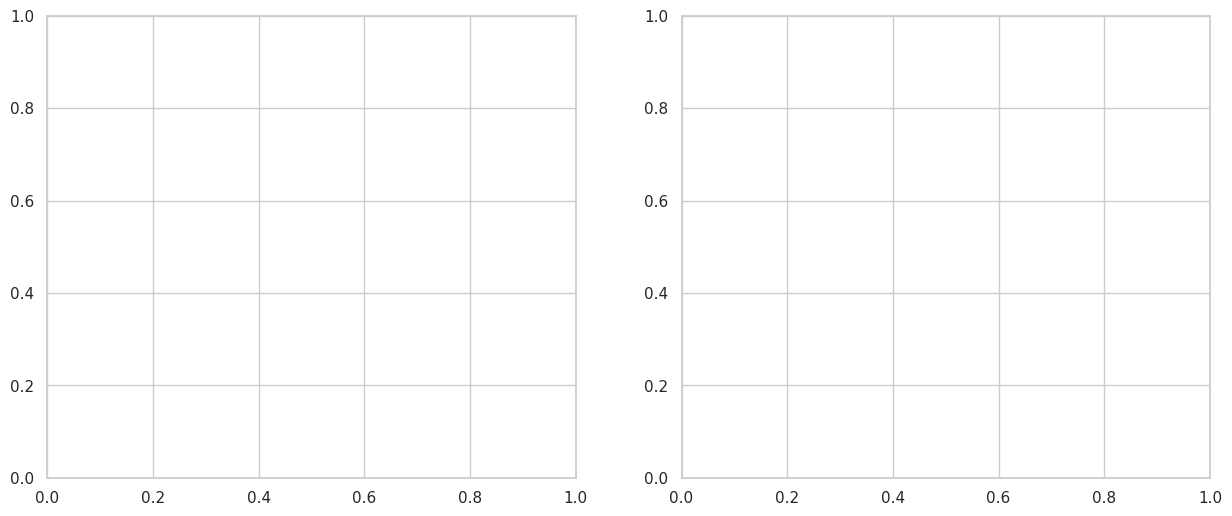

In [ ]:
##Trend Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Revenue per Employee over Time
sns.lineplot(x='year', y='revenue_per_employee', data=df_metrics, marker='o', ax=axes[0])
axes[0].set_title('Revenue per Employee Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Revenue per Employee')

# Plot Utilization Rate over Time
sns.lineplot(x='year', y='utilization_rate', data=df_metrics, marker='o', ax=axes[1])
axes[1].set_title('Utilization Rate Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Utilization Rate')

# Display the plots
plt.tight_layout()
plt.show()

- Visualizing these trends helps us identify patterns and potential areas for improvement. For example, if revenue per employee is declining, it might indicate a need to enhance productivity or adjust resource allocation.
- Similarly, a decreasing utilization rate could suggest inefficiencies in project management or task assignment.

In [ ]:
## Correlation Analysis
# Calculate the correlation between employees and revenue_per_employee
correlation = df_metrics['employees'].corr(df_metrics['revenue_per_employee'])

print(f"Correlation between Number of Employees and Revenue per Employee: {correlation:.2f}")

KeyError: 'employees'

- Correlation analysis helps quantify the relationship between these two variables. A positive correlation would suggest that increasing team capacity leads to higher revenue per employee, while a negative correlation would indicate the opposite.

### **Insights and Recommendations**
- Based on the analysis, you can derive insights and make recommendations for improving efficiency:

**Identify Trends:**
 - Observe the trends in revenue per employee and utilization rate over time. Are they increasing, decreasing, or remaining stable?

**Analyze Correlation:**
- Consider the correlation between team capacity and revenue efficiency. Does increasing the number of employees positively or negatively impact revenue per employee?

- **Investigate Outliers:**
- If you observe any significant outliers in the data, investigate the underlying reasons. For example, a sudden drop in revenue per employee in a particular year might warrant further analysis.

**Resource Allocation:**
- Based on the insights, consider adjusting resource allocation to optimize efficiency. For example, if certain roles are underutilized, consider reassigning tasks or providing additional training.

**Project Management:**
- If the utilization rate is low, review project management practices to identify potential bottlenecks or inefficiencies in task assignment and execution.

**Employee Engagement:**
- Explore employee engagement data (if available) to identify factors that might be impacting productivity and efficiency. Address any potential roadblocks or concerns raised by employees.